In [ ]:
#répartition des extraits par époque

In [1]:
ep1 = "/home/port-pret-etu01/Documents/LATTICE/conllu/1810-1840.conllu"
ep2 = "/home/port-pret-etu01/Documents/LATTICE/conllu/1841-1913.conllu"
ep3 = "/home/port-pret-etu01/Documents/LATTICE/conllu/1914-2009.conllu"

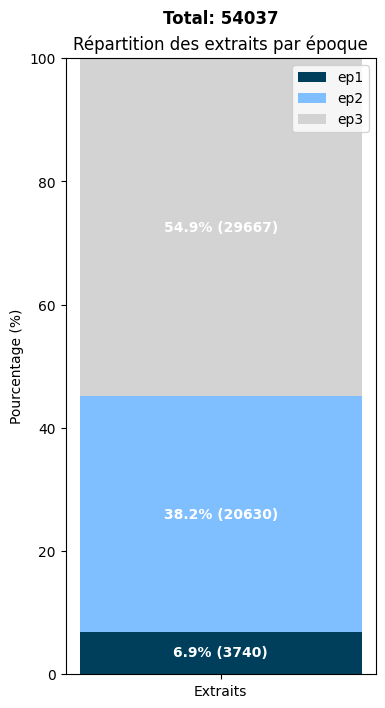

époque  extraits  pourcentage
   ep1      3740     6.921184
   ep2     20630    38.177545
   ep3     29667    54.901271


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def count_extraits(file):
    compteur = 1
    with open(file, "r") as f:
        contenu = f.readlines()
        for ligne in contenu:
            if ligne.strip() == "":
                compteur += 1
    return compteur

def plot_extraits_distribution(files):
    resultats = {f"ep{i+1}": count_extraits(file) for i, file in enumerate(files)}
    df = pd.DataFrame(list(resultats.items()), columns=["époque", "extraits"])
    
    total_extraits = df["extraits"].sum()
    df["pourcentage"] = df["extraits"] / total_extraits * 100
    
    fig, ax = plt.subplots(figsize=(4, 8))
    bas = 0
    couleurs = ["#003f5c", "#7fbfff", "#d3d3d3"] 
    
    for (label, valeur, couleur, extrait) in zip(df["époque"], df["pourcentage"], couleurs, df["extraits"]):
        ax.bar("Extraits", valeur, bottom=bas, color=couleur, label=label)
        ax.text(0, bas + valeur / 2, f"{valeur:.1f}% ({extrait})", ha='center', va='center', color='white', fontsize=10, fontweight='bold')
        bas += valeur
    
    ax.set_ylabel("Pourcentage (%)")
    ax.set_title("Répartition des extraits par époque")
    ax.set_ylim(0, 100)
    ax.legend()
    ax.text(0, 105, f"Total: {total_extraits}", ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    plt.savefig("/home/port-pret-etu01/Documents/LATTICE/méta/output/extraits_distribution.png")
    plt.show()
    
    return df

fichiers = [ep1, ep2, ep3]
df = plot_extraits_distribution(fichiers)
print(df.to_string(index=False))